In [30]:
!pip install pandas
!pip install numpy
!pip install matplotlib.pyplot
!pip install seaborn
!pip install warnings
!pip install scikit-learn
!pip install imblearn

You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import boxcox

In [32]:
df_lab = pd.read_csv(r"speciy/the/path")
df_val = pd.read_csv(r"speciy/the/path")

In [6]:
df_lab.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [7]:
df_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


### The ECG cycle
In an electrocardiogram (ECG or EKG), the heart's electrical activity is recorded over time. The ECG waveform consists of different segments and waves, each representing specific electrical events during the cardiac cycle. Here's a breakdown of the main waves and segments:

### 1. **P Wave**
   - **Description:** The P wave represents the depolarization of the atria, the two upper chambers of the heart.
   - **Relevance:** The P wave indicates the initiation of the heartbeat. A normal P wave is small and rounded. Abnormalities in the P wave can suggest issues like atrial enlargement or atrial fibrillation.

### 2. **QRS Complex**
   - **Description:** The QRS complex represents the depolarization of the ventricles, the two lower chambers of the heart. It consists of three parts:
     - **Q Wave:** The initial downward deflection following the P wave.
     - **R Wave:** The large upward deflection following the Q wave.
     - **S Wave:** The downward deflection following the R wave.
   - **Relevance:** The QRS complex indicates the electrical impulse traveling through the ventricles, leading to their contraction. A normal QRS complex is narrow and tall. A wide or abnormal QRS complex can indicate issues like bundle branch blocks or ventricular hypertrophy.

### 3. **T Wave**
   - **Description:** The T wave represents the repolarization (recovery) of the ventricles after they have contracted.
   - **Relevance:** The T wave shows the ventricles returning to their resting state. An inverted T wave or abnormal T wave shape can suggest conditions like ischemia (reduced blood flow) or electrolyte imbalances.

### 4. **U Wave**
   - **Description:** The U wave is a small wave that sometimes follows the T wave. Its exact origin is unclear, but it is thought to represent the repolarization of the Purkinje fibers (part of the heart's electrical conduction system).
   - **Relevance:** The U wave is often small and not always present. However, a prominent U wave may indicate conditions like hypokalemia (low potassium levels) or hypercalcemia (high calcium levels).

### 5. **ST Segment**
   - **Description:** The ST segment is the flat, isoelectric section of the ECG between the end of the S wave and the beginning of the T wave.
   - **Relevance:** The ST segment represents the period when the ventricles are fully depolarized and are beginning to repolarize. The normal ST segment should be flat and level with the baseline. Deviations from the baseline (elevation or depression) can indicate serious conditions:
     - **ST Elevation:** Often indicates acute myocardial infarction (heart attack) or pericarditis.
     - **ST Depression:** Can indicate ischemia or the presence of a non-ST-elevation myocardial infarction (NSTEMI).

### 6. **PR Interval**
   - **Description:** The PR interval is the time from the start of the P wave to the start of the QRS complex.
   - **Relevance:** The PR interval represents the time it takes for the electrical impulse to travel from the atria to the ventricles. A prolonged PR interval can suggest first-degree heart block, while a short PR interval can indicate pre-excitation syndromes like Wolff-Parkinson-White syndrome.

### 7. **QT Interval**
   - **Description:** The QT interval extends from the start of the Q wave to the end of the T wave.
   - **Relevance:** The QT interval represents the total time for ventricular depolarization and repolarization. A prolonged QT interval can increase the risk of arrhythmias, such as Torsades de Pointes. Shortened QT intervals can indicate hypercalcemia.

### 8. **RR Interval**
   - **Description:** The RR interval is the time between two successive R waves.
   - **Relevance:** The RR interval is used to calculate the heart rate. A shorter RR interval indicates a faster heart rate, while a longer interval indicates a slower heart rate.

### Summary
- **P Wave:** Atrial depolarization.
- **QRS Complex:** Ventricular depolarization.
- **T Wave:** Ventricular repolarization.
- **U Wave:** Purkinje fiber repolarization (sometimes visible).
- **ST Segment:** Ventricular depolarization (early repolarization).
- **PR Interval:** Atrial depolarization to ventricular depolarization.
- **QT Interval:** Entire process of ventricular depolarization and repolarization.
- **RR Interval:** Interval between heartbeats, used to measure heart rate.

Understanding these waves and intervals is crucial in interpreting ECGs and diagnosing various cardiac conditions.

Let's break down each feature in the dataset to understand what it represents and its relevance to heart disease prediction:

### 1. **patient_id (type: int)**
   - **Description:** A unique and random identifier assigned to each patient.
   - **Relevance:** This column is not used in the analysis or modeling as it doesn't contain any medical information relevant to heart disease prediction. It simply serves as an identifier for each record.

### 2. **slope_of_peak_exercise_st_segment (type: int)**
   - **Description:** This represents the slope of the peak exercise ST segment, which is an electrocardiography (EKG/ECG) measurement. It indicates the heart's response to exercise and the quality of blood flow to the heart.
   - **Relevance:** Abnormal slopes can indicate ischemia (reduced blood flow to the heart), which is a critical factor in diagnosing heart disease.

### 3. **thal (type: categorical)**
   - **Description:** This feature is the result of a thallium stress test, which measures how well blood flows to the heart muscle during exercise. The possible values are:
     - **Normal:** Indicates normal blood flow.
     - **Fixed Defect:** Indicates a region of the heart that is not receiving enough blood at rest and during exercise.
     - **Reversible Defect:** Indicates a region of the heart that is not receiving enough blood during exercise but normal at rest.
   - **Relevance:** The thallium stress test is a common diagnostic tool for assessing coronary artery disease, so this feature is directly relevant to predicting heart disease.

### 4. **resting_blood_pressure (type: int)**
   - **Description:** This is the patient's blood pressure (measured in mm Hg) when at rest.
   - **Relevance:** High resting blood pressure is a significant risk factor for heart disease, as it can lead to the hardening and narrowing of arteries, which increases the risk of heart attack or stroke.

### 5. **chest_pain_type (type: int)**
   - **Description:** This indicates the type of chest pain experienced by the patient, with 4 possible values:
     - **0:** Typical angina (chest pain related to reduced blood flow to the heart)
     - **1:** Atypical angina
     - **2:** Non-anginal pain
     - **3:** Asymptomatic
   - **Relevance:** Chest pain, especially typical angina, is a common symptom of coronary artery disease, making this feature crucial for predicting heart disease.

### 6. **num_major_vessels (type: int)**
   - **Description:** The number of major vessels (ranging from 0 to 3) that are colored by fluoroscopy. Fluoroscopy is an imaging technique used to visualize the blood flow in the arteries.
   - **Relevance:** The more vessels that are blocked or narrowed, the higher the risk of heart disease. This feature provides a direct measure of the extent of arterial blockage.

### 7. **fasting_blood_sugar_gt_120_mg_per_dl (type: binary)**
   - **Description:** Indicates whether the patient's fasting blood sugar level is greater than 120 mg/dl.
     - **0:** Less than or equal to 120 mg/dl
     - **1:** Greater than 120 mg/dl
   - **Relevance:** High blood sugar levels are associated with diabetes, which is a significant risk factor for heart disease.

### 8. **resting_ekg_results (type: int)**
   - **Description:** This represents the results of a resting electrocardiogram (EKG/ECG), with possible values:
     - **0:** Normal
     - **1:** Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV)
     - **2:** Showing probable or definite left ventricular hypertrophy by Estes' criteria
   - **Relevance:** Abnormal EKG results can indicate underlying heart problems, such as ischemia or hypertrophy, which are linked to heart disease.

### 9. **serum_cholesterol_mg_per_dl (type: int)**
   - **Description:** The level of serum cholesterol in the blood, measured in mg/dl.
   - **Relevance:** High cholesterol levels are a major risk factor for atherosclerosis (hardening and narrowing of the arteries), which can lead to heart disease.

### 10. **oldpeak_eq_st_depression (type: float)**
   - **Description:** This represents the amount of ST depression (a specific finding on an EKG) induced by exercise relative to rest.
   - **Relevance:** ST depression is an indicator of ischemia during exercise, making it a valuable feature for assessing the risk of heart disease.

### 11. **sex (type: binary)**
   - **Description:** The gender of the patient.
     - **0:** Female
     - **1:** Male
   - **Relevance:** Gender plays a role in the risk and presentation of heart disease, with males generally having a higher risk at younger ages compared to females.

### 12. **age (type: int)**
   - **Description:** The age of the patient in years.
   - **Relevance:** Age is one of the most significant risk factors for heart disease, with risk increasing as people get older.

### 13. **max_heart_rate_achieved (type: int)**
   - **Description:** The maximum heart rate achieved by the patient during exercise.
   - **Relevance:** A lower maximum heart rate can indicate poor cardiovascular fitness and is often associated with a higher risk of heart disease.

### 14. **exercise_induced_angina (type: binary)**
   - **Description:** Indicates whether the patient experiences angina (chest pain) induced by exercise.
     - **0:** No
     - **1:** Yes
   - **Relevance:** Exercise-induced angina is a strong indicator of underlying heart disease, as it suggests that the heart is not getting enough oxygen during physical activity.

### Summary
These features together provide a comprehensive set of variables that can be used to assess a patient’s risk for heart disease. The dataset includes clinical data, such as blood pressure, cholesterol levels, and results from EKG and stress tests, which are all critical in predicting heart conditions. Understanding these features is key to performing accurate analysis and building effective predictive models.

In [8]:
print(df_val.shape)
print(df_lab.shape)

(180, 14)
(180, 2)


In [9]:
"""info() facilitates comprehension of the data type and related information, such as the quantity of records in each column, 
whether the data is null or not, the type of data, and the dataset’s memory use."""
print(df_val.info())
print(" The Info for label dataset")
print(df_lab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [10]:
"""The DataFrame “df” is statistically summarized by the code df.describe(), which gives the count, mean, standard deviation, minimum, 
and quartiles for each numerical column.The dataset’s central tendencies and spread are briefly summarized."""
print(df_lab.describe())
print(df_val.describe())

       heart_disease_present
count             180.000000
mean                0.444444
std                 0.498290
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                 1.000000
max                 1.000000
       slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.6

In [11]:
"""The code df.isnull().sum() checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column"""
print(df_val.isnull().sum())
print(df_lab.isnull().sum())

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64
patient_id               0
heart_disease_present    0
dtype: int64


In [12]:
"""The function df.nunique() determines how many unique values there are in each column of the DataFrame “df,” offering information about the variety of data that makes up each feature."""
print(df_val.nunique())
print(df_lab.nunique())

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64
patient_id               180
heart_disease_present      2
dtype: int64


### Exploratory Data Analysis (EDA) Overview
Exploratory Data Analysis (EDA) involves analyzing and visualizing data to uncover patterns, anomalies, and relationships. It helps in understanding the dataset and identifying the steps needed for further analysis or model building. Below are both the general steps and specific steps tailored to your heart disease dataset.

In [13]:
copy_val=df_val.copy
copy_lab=df_lab.copy

In [14]:
# converting categorical to numerical value
print(df_val['thal'].unique())


['normal' 'reversible_defect' 'fixed_defect']


In [15]:
thal_mapping = {
    'normal': 0,
    'fixed_defect': 1,
    'reversible_defect': 2
}

df_val['thal'] = df_val['thal'].map(thal_mapping)


In [16]:
print(df_val[['thal']].head())

   thal
0     0
1     0
2     0
3     2
4     2


In [17]:
# Merge the datasets on patient_id
df = pd.merge(df_val, df_lab, on='patient_id')

### Focus on Numerical Columns
Why? Descriptive statistics like mean, median, variance, and standard deviation are most informative for numerical columns, as they provide insights into the central tendency, spread, and distribution shape.
Numerical Columns in Your Dataset:

age
resting_blood_pressure
serum_cholesterol_mg_per_dl
max_heart_rate_achieved
oldpeak_eq_st_depression
num_major_vessels
slope_of_peak_exercise_st_segment
Apply Descriptive Statistics to These Columns:

All of the above numerical columns should have descriptive statistics applied. This will help you understand the distribution of patient characteristics and cardiovascular health indicators, which are crucial for predicting heart disease

In [18]:
numerical_columns = [
    'age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 
    'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'num_major_vessels', 
    'slope_of_peak_exercise_st_segment'
]

# Descriptive statistics for numerical columns
for col in numerical_columns:
    print(f"Statistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Variance: {df[col].var()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurtosis()}")
    print("\n")


Statistics for age:
Mean: 54.81111111111111
Median: 55.0
Mode: 54
Variance: 87.13730602110489
Standard Deviation: 9.334736526603463
Skewness: -0.19916557103159252
Kurtosis: -0.5673461739656789


Statistics for resting_blood_pressure:
Mean: 131.3111111111111
Median: 130.0
Mode: 130
Variance: 289.355183116077
Standard Deviation: 17.010443354483062
Skewness: 0.6570798993636248
Kurtosis: 0.47310468283475293


Statistics for serum_cholesterol_mg_per_dl:
Mean: 249.2111111111111
Median: 245.5
Mode: 204
Variance: 2779.1842333954064
Standard Deviation: 52.71796879049312
Skewness: 1.2739315506526112
Kurtosis: 6.364424970640193


Statistics for max_heart_rate_achieved:
Mean: 149.48333333333332
Median: 152.0
Mode: 162
Variance: 486.7986033519553
Standard Deviation: 22.063512942230105
Skewness: -0.3937048051980345
Kurtosis: -0.48297052711987565


Statistics for oldpeak_eq_st_depression:
Mean: 1.01
Median: 0.8
Mode: 0.0
Variance: 1.2574413407821228
Standard Deviation: 1.1213569194427448
Skewness: 1.

In [19]:
binary_columns = ['sex', 'fasting_blood_sugar_gt_120_mg_per_dl', 'exercise_induced_angina']

# Descriptive statistics for binary columns
for col in binary_columns:
    print(f"Mode for {col}: {df[col].mode()[0]}")
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")


Mode for sex: 1
Value Counts for sex:
sex
1    124
0     56
Name: count, dtype: int64

Mode for fasting_blood_sugar_gt_120_mg_per_dl: 0
Value Counts for fasting_blood_sugar_gt_120_mg_per_dl:
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64

Mode for exercise_induced_angina: 0
Value Counts for exercise_induced_angina:
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64



In [20]:

# Descriptive statistics for categorical columns
categorical_columns = ['thal', 'chest_pain_type']  # Add more categorical columns if needed
for col in categorical_columns:
    print(f"Mode for {col}: {df[col].mode()[0]}")
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")

Mode for thal: 0
Value Counts for thal:
thal
0    98
2    74
1     8
Name: count, dtype: int64

Mode for chest_pain_type: 4
Value Counts for chest_pain_type:
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64



In [21]:
# Descriptive statistics for the heart_disease_present column
print(f"Value Counts for heart_disease_present:\n{df['heart_disease_present'].value_counts()}")
print(f"Proportion of heart disease present:\n{df['heart_disease_present'].mean()}")  # Proportion of 1s


Value Counts for heart_disease_present:
heart_disease_present
0    100
1     80
Name: count, dtype: int64
Proportion of heart disease present:
0.4444444444444444


In [22]:
# Handling Skewness
# Apply log transformation to reduce skewness for highly skewed features

# Applying log transformation to reduce skewness
df_val['serum_cholesterol_mg_per_dl'] = np.log1p(df_val['serum_cholesterol_mg_per_dl'])
df_val['oldpeak_eq_st_depression'] = np.log1p(df_val['oldpeak_eq_st_depression'])
df_val['num_major_vessels'] = np.log1p(df_val['num_major_vessels'])

# Encoding Categorical Variables
# OneHotEncoding for 'thal' and 'chest_pain_type'
df_val = pd.get_dummies(df_val, columns=['thal', 'chest_pain_type'], drop_first=True)

# Combining the heart_disease_present label with the main dataframe using a merge operation
# df_lab contains heart_disease_present data
df_val = df_val.merge(df_lab, on='patient_id', how='inner')

# Feature Scaling (Optional)
# Scaling the numerical features to have mean=0 and variance=1 (standardizing)
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 
                      'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 
                      'num_major_vessels', 'slope_of_peak_exercise_st_segment']

scaler = StandardScaler()
df_val[numerical_features] = scaler.fit_transform(df_val[numerical_features])

# Check the processed DataFrame
print(df_val.head())

# Save the processed DataFrame for further modeling
df_val.to_csv('processed_heart_disease_data.csv', index=False)


  patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0     0z64un                          -0.891241               -0.195195   
1     ryoo3j                           0.729197               -1.256320   
2     yt1s1x                          -0.891241               -0.372049   
3     l2xjde                          -0.891241                1.219639   
4     oyt4ek                           2.349636                2.752375   

   num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0          -0.781639                                     0   
1          -0.781639                                     0   
2           1.991930                                     0   
3          -0.781639                                     0   
4          -0.781639                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  \
0                    2                     1.136120                 -1.114680   
1             

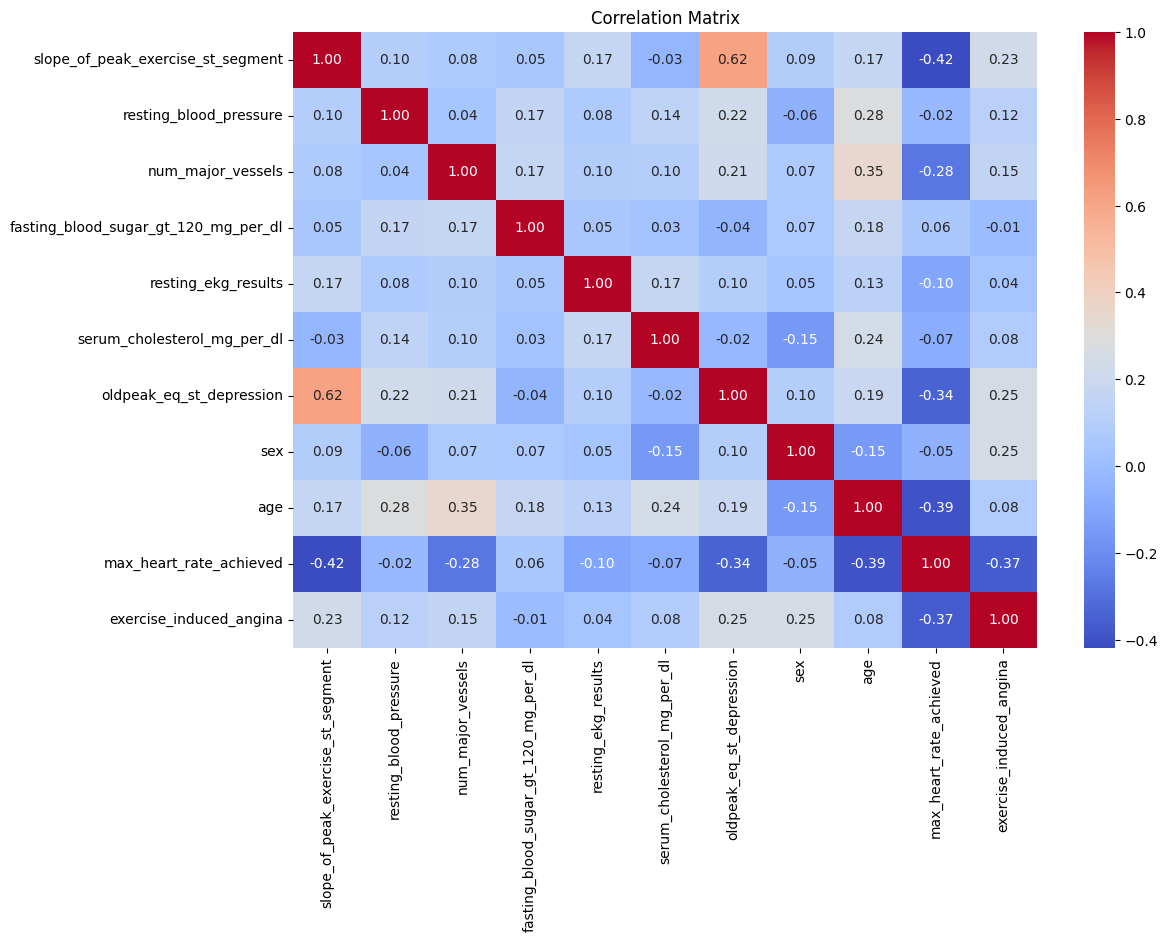

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.84      0.84      0.84        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40

Confusion Matrix:
 [[18  3]
 [ 3 16]]
Accuracy Score: 0.85
ROC AUC Score: 0.9122807017543859


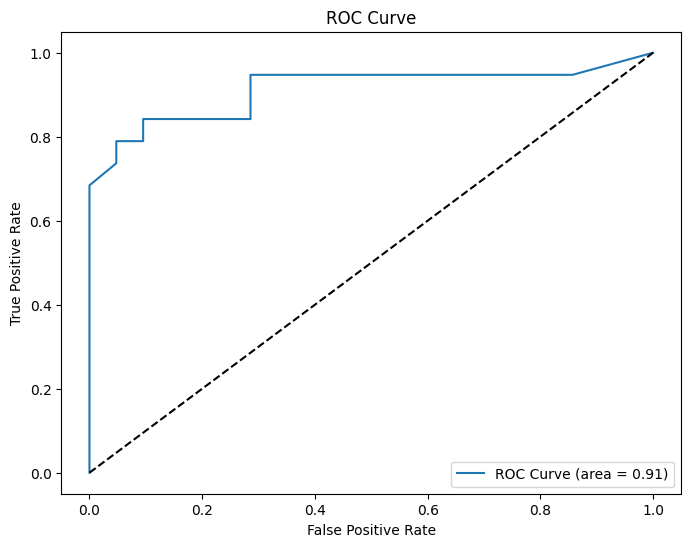

In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

# Ensure to exclude non-numeric columns like patient_id before computing the correlation matrix
numeric_df_val = df_val.select_dtypes(include=[np.number])

# Correlation Matrix
corr_matrix = numeric_df_val.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Refined feature selection based on correlation and domain knowledge
selected_features = ['chest_pain_type_4', 'thal_reversible_defect', 'num_major_vessels',
                     'exercise_induced_angina', 'oldpeak_eq_st_depression']

X = df_val[selected_features]
y = df_lab['heart_disease_present']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Build the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.88      0.74      0.80        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

Confusion Matrix:
 [[19  2]
 [ 5 14]]
Accuracy Score: 0.825
ROC AUC Score: 0.9097744360902256


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.88      0.74      0.80        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

Confusion Matrix:
 [[19  2]
 [ 5 14]]
Accuracy Score: 0.825
ROC AUC Score: 0.9085213032581454


In [37]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.83      0.79      0.81        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

Confusion Matrix:
 [[18  3]
 [ 4 15]]
Accuracy Score: 0.825
ROC AUC Score: 0.93734335839599


In [39]:
!pip install xgboost

You should consider upgrading via the 'c:\users\user\python39\python.exe -m pip install --upgrade pip' command.


In [41]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.87      0.68      0.76        19

    accuracy                           0.80        40
   macro avg       0.81      0.79      0.80        40
weighted avg       0.81      0.80      0.80        40

Confusion Matrix:
 [[19  2]
 [ 6 13]]
Accuracy Score: 0.8
ROC AUC Score: 0.9172932330827067


In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.84      0.84      0.84        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40

Confusion Matrix:
 [[18  3]
 [ 3 16]]
Accuracy Score: 0.85
ROC AUC Score: 0.8759398496240602
